In [18]:
import pandas as pan
import matplotlib.pyplot as plotter
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

In [19]:
matrix_data = pan.read_csv("bank-full.csv")

In [20]:
matrix_data.isna().sum().sum()

0

In [21]:
matrix_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


(0.0, 700.0)

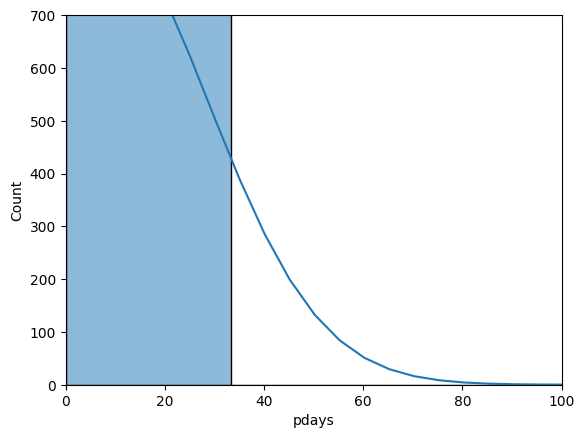

In [22]:
sns.histplot(x = matrix_data["pdays"], kde = True, bins = 30)
plotter.xlim(0, 100)
plotter.ylim(0, 700)

In [23]:
matrix_data["contact"].unique()
matrix_data["duration"].sort_values()

33015       0
23031       0
28063       0
6251        0
28239       1
         ... 
7727     3631
13820    3643
40537    3785
22192    4199
24091    4918
Name: duration, Length: 41188, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

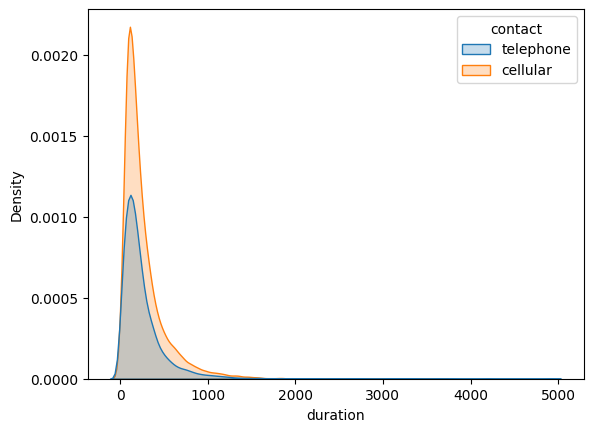

In [24]:
sns.kdeplot(x = matrix_data["duration"], hue = matrix_data["contact"], fill = True)

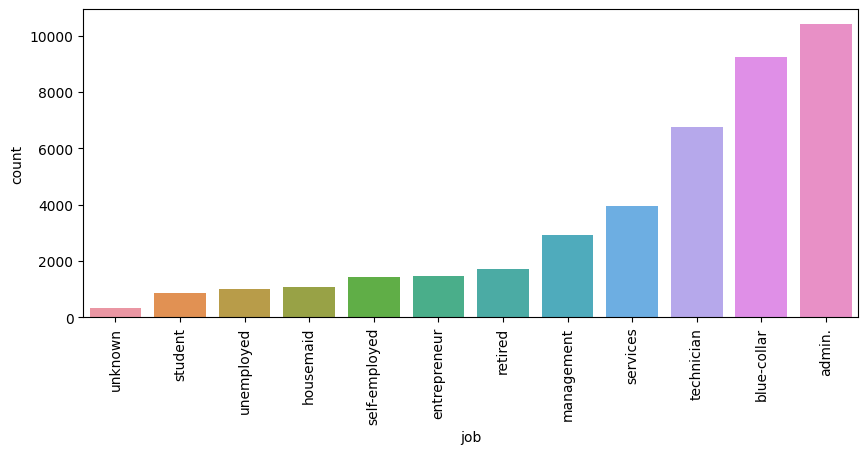

In [25]:
plotter.figure(figsize = (10, 4), dpi = 100)
sns.countplot(x = matrix_data["job"], order = matrix_data["job"].value_counts(ascending = True).index)
plotter.xticks(rotation = 90);

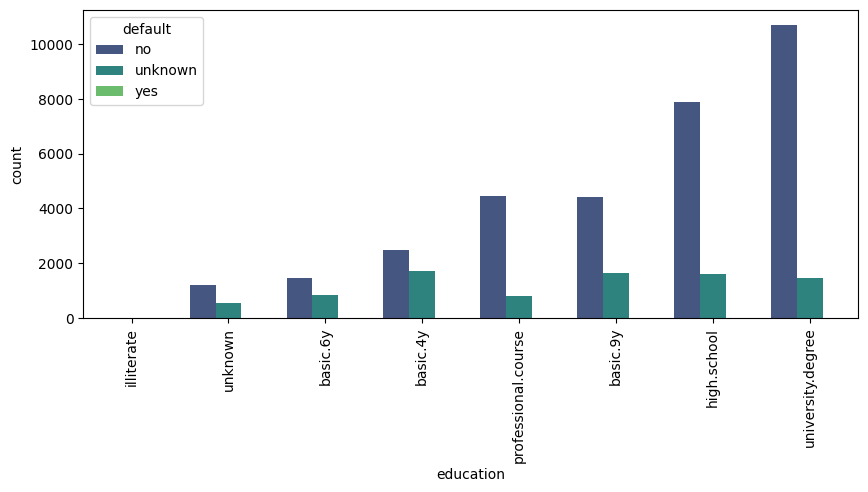

In [26]:
plotter.figure(figsize = (10, 4), dpi = 100)
sns.countplot(x = matrix_data["education"], order = matrix_data["education"].value_counts(ascending = True).index, palette = "viridis", hue = matrix_data["default"])
plotter.xticks(rotation = 90);

In [27]:
matrix_data["default"].value_counts(ascending = True)[0]

3

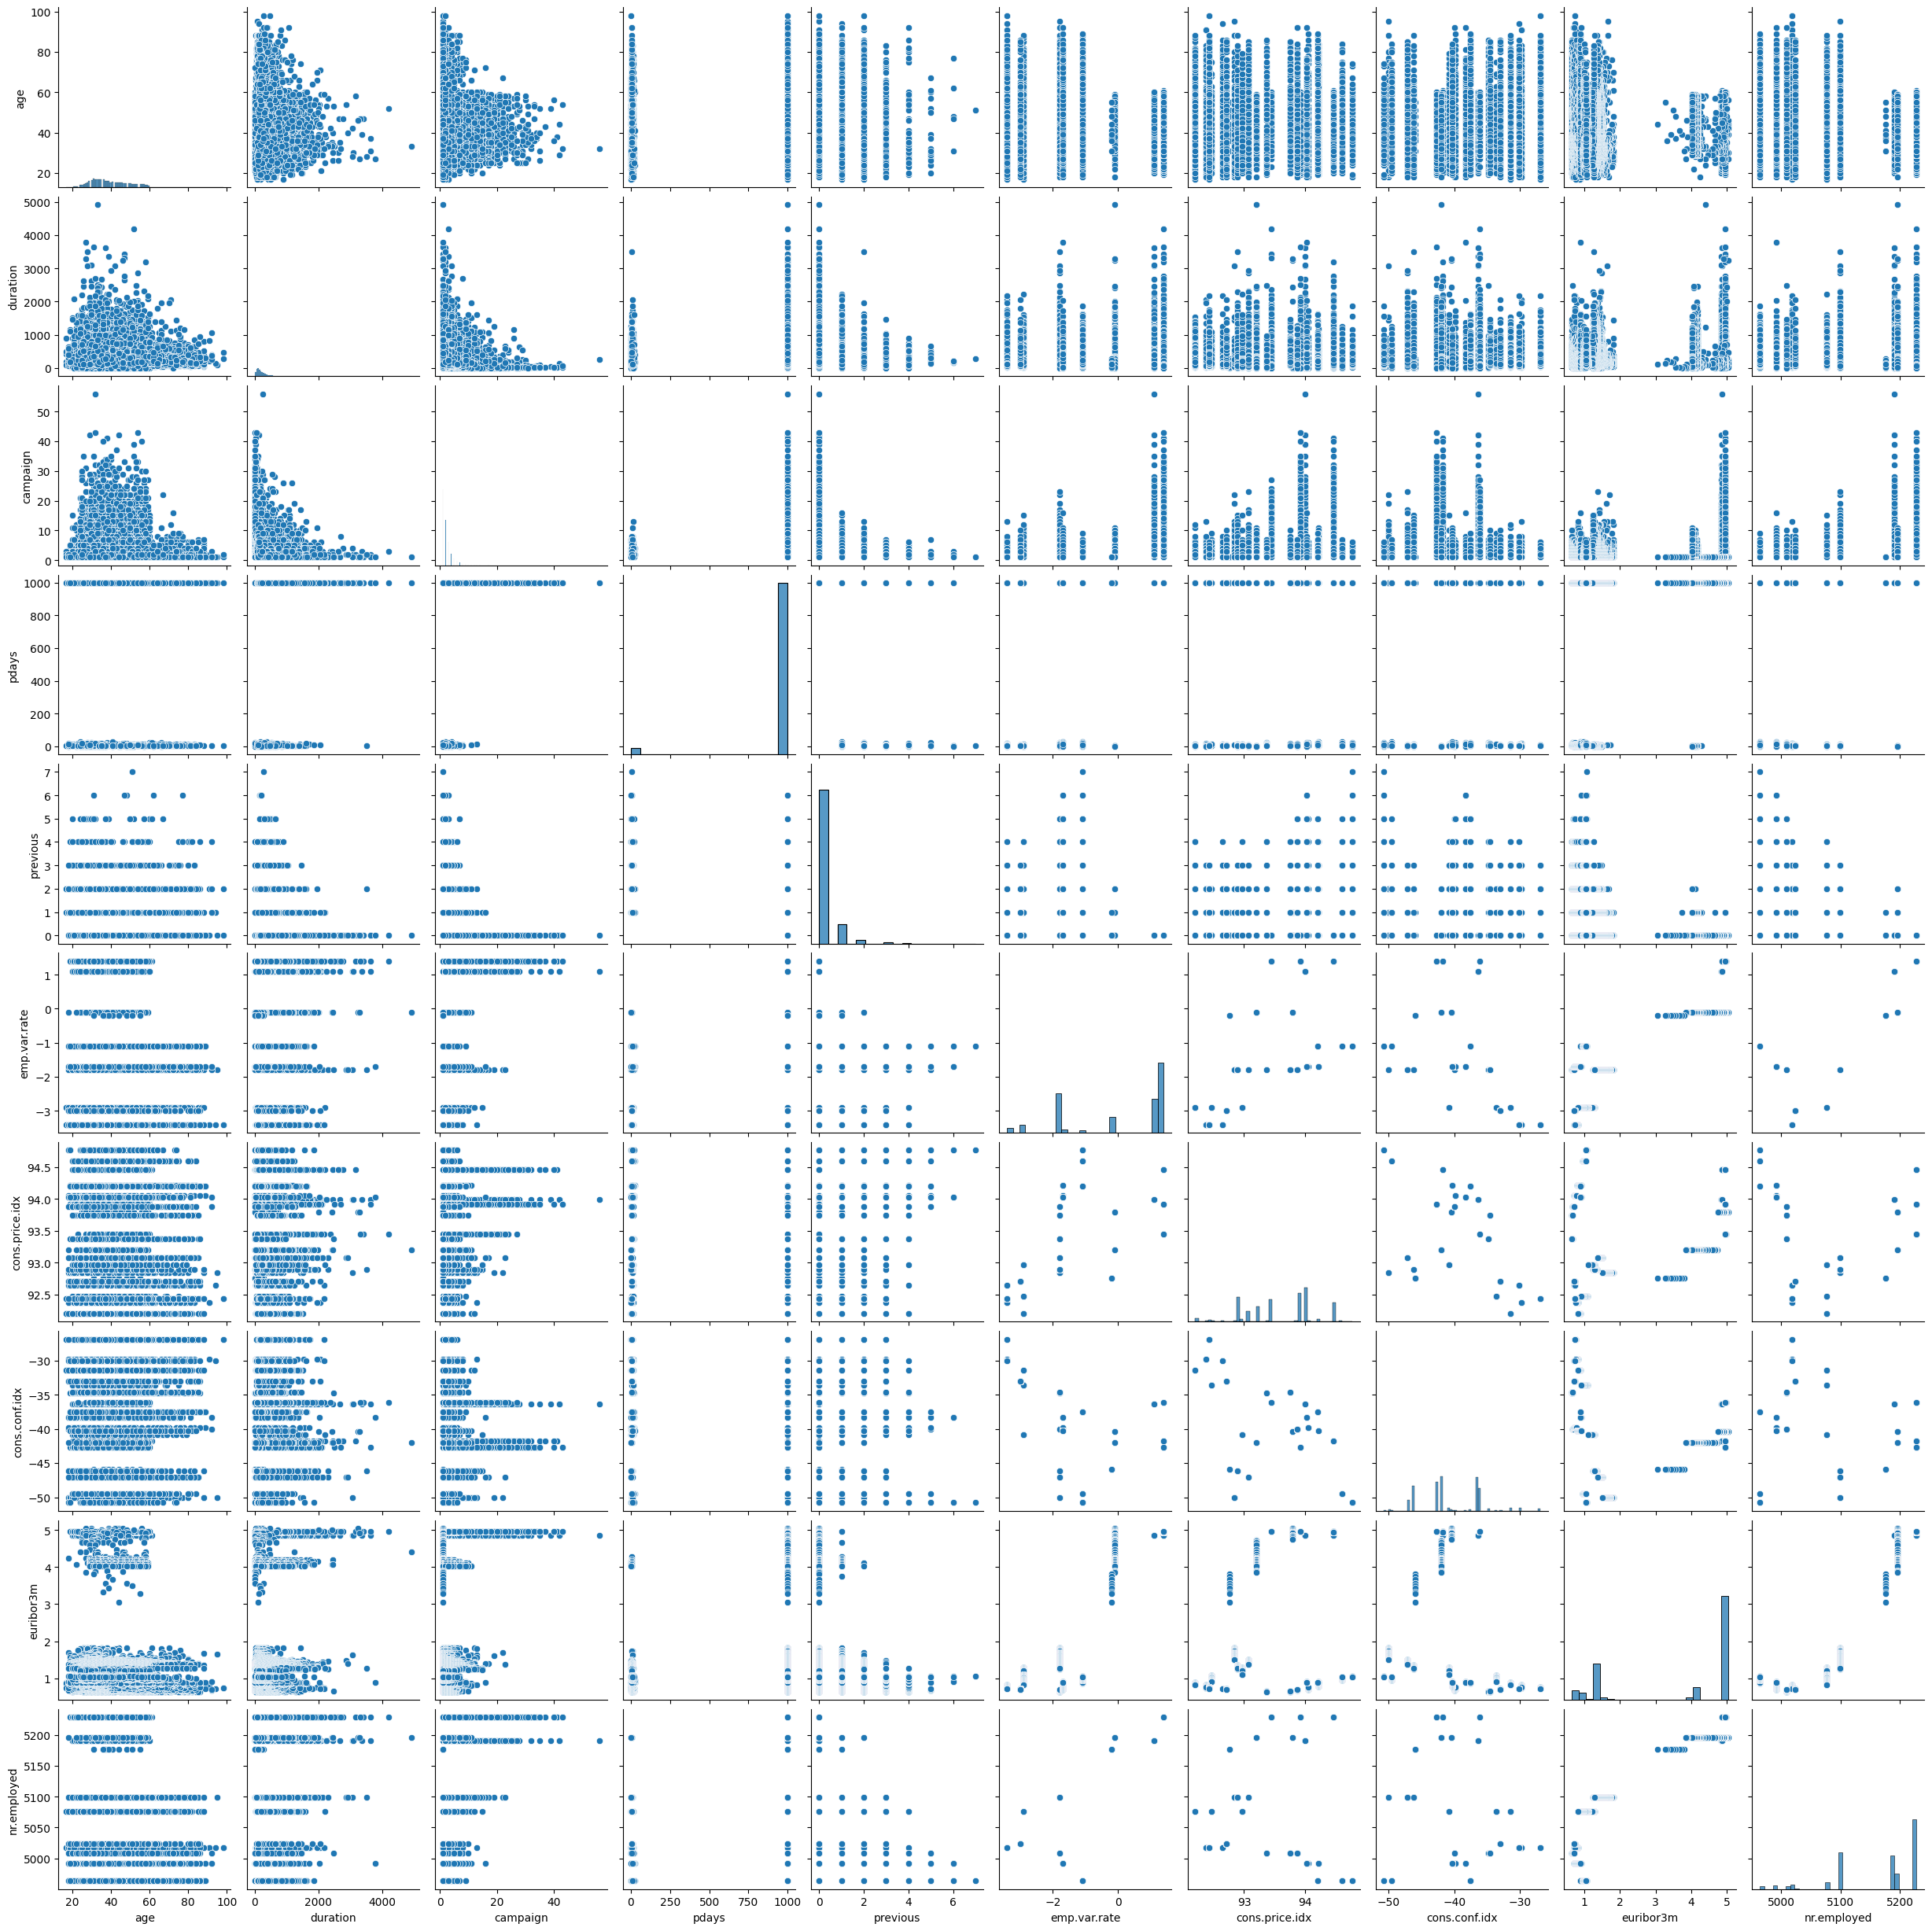

In [28]:
sns.pairplot(matrix_data)

In [29]:
encoder = OneHotEncoder()
test_features = encoder.fit_transform(matrix_data)
features = pan.get_dummies(matrix_data)

In [30]:
scaler = StandardScaler()
s_features = scaler.fit_transform(features)

In [31]:
test_features = StandardScaler(with_mean = False).fit_transform(X = test_features)
test_features

<41188x2143 sparse matrix of type '<class 'numpy.float64'>'
	with 864948 stored elements in Compressed Sparse Row format>

In [32]:
klearner = KMeans(n_clusters = 2, n_init = "auto")

In [34]:
labels = klearner.fit_predict(s_features)

In [36]:
features["Label"] = labels

<Axes: >

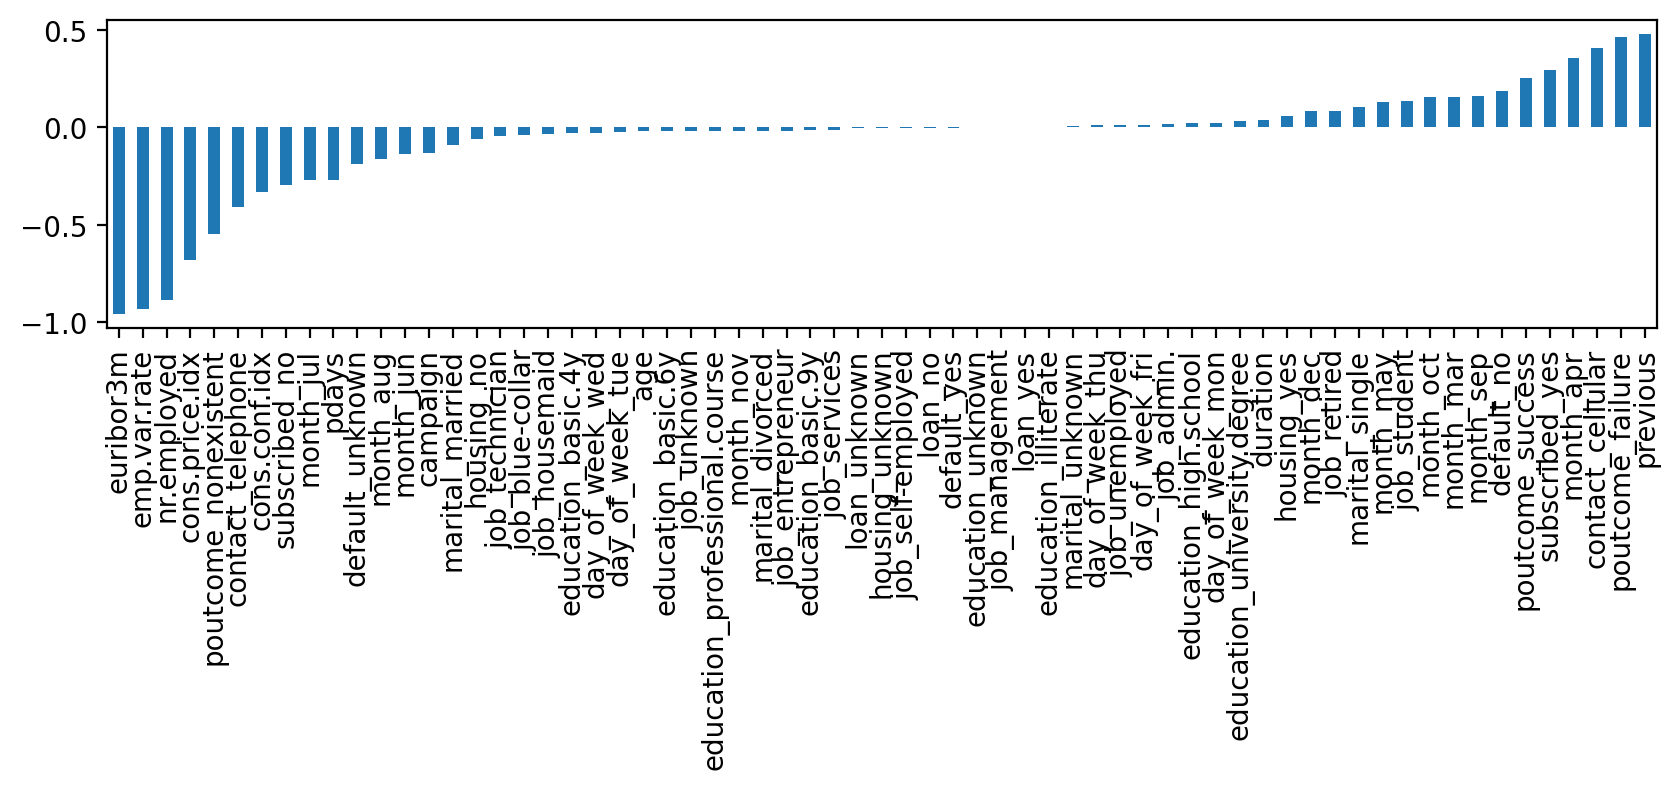

In [43]:
plotter.figure(figsize = (10, 2), dpi = 200)
features.corr()["Label"].sort_values()[: -1].plot(kind = "bar")

In [44]:
#elbow method of obtaining optimal Kvalue
def elbow_method(limit = 15, data = s_features):
    sum_of_squares_diff = []
    for i in range(1, limit):
        learner = KMeans(n_clusters = i, n_init = "auto")
        learner.fit(data)
        sum_of_squares_diff.append(learner.inertia_)
    return sum_of_squares_diff    
elbow_method()#SSD: distance between point and cluster centre

[2677219.999999998,
 2469792.3946254277,
 2370787.8799482677,
 2340852.7214297047,
 2228290.021180792,
 2252893.372565539,
 2148734.7584557817,
 2042042.4377594446,
 1991552.1446153552,
 2099834.2724527107,
 2027902.7370418143,
 1964479.1704947222,
 1979914.0356419443,
 1872605.8826509682]

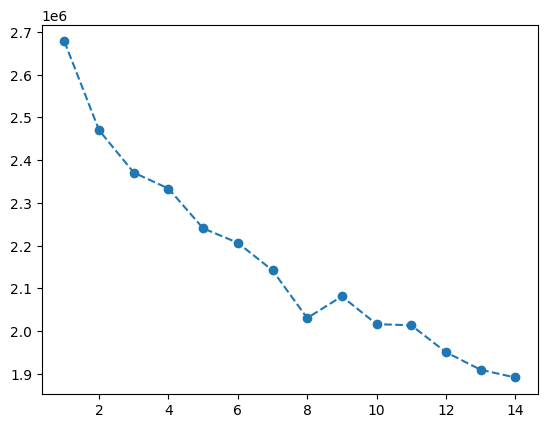

In [49]:
ssds = elbow_method()
plotter.plot(range(1, len(ssds) + 1), ssds, "o--")

In [50]:
matrix_ssds = pan.Series(ssds)
matrix_ssds.diff()

0               NaN
1    -207427.618965
2     -99005.037152
3     -37340.245408
4     -92978.413469
5     -33866.584098
6     -64301.381546
7    -111553.727385
8      50725.187980
9     -64947.304496
10     -2617.664612
11    -62934.686989
12    -41047.494142
13    -18044.179917
dtype: float64